In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [112]:
import kagglehub

path = kagglehub.dataset_download("iabhishekofficial/mobile-price-classification")

In [92]:
# 1. Selection of the dataset
try:
  df = pd.read_csv(path + '/test.csv')
except FileNotFoundError:
  print("Error: El archivo 'data.csv' no fue encontrado. Por favor, verifica la ruta del archivo.")
  exit()

# EDA

In [93]:
df.shape

(1000, 21)

In [94]:
df.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [95]:
df.drop('id', axis=1, inplace=True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  px_height      1000 non-null   int64  
 12  px_width       1000 non-null   int64  
 13  ram            1000 non-null   int64  
 14  sc_h           1000 non-null   int64  
 15  sc_w           1000 non-null   int64  
 16  talk_time      1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_scr

In [97]:
df.describe()

battery_power         blue  clock_speed     dual_sim           fc  \
count    1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     1248.510000     0.516000     1.540900     0.517000     4.593000   
std       432.458227     0.499994     0.829268     0.499961     4.463325   
min       500.000000     0.000000     0.500000     0.000000     0.000000   
25%       895.000000     0.000000     0.700000     0.000000     1.000000   
50%      1246.500000     1.000000     1.500000     1.000000     3.000000   
75%      1629.250000     1.000000     2.300000     1.000000     7.000000   
max      1999.000000     1.000000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep   mobile_wt      n_cores  \
count  1000.000000  1000.000000  1000.000000  1000.00000  1000.000000   
mean      0.487000    33.652000     0.517500   139.51100     4.328000   
std       0.500081    18.128694     0.280861    34.85155     2.288155   
min       0.000000     2.000000     0.100000    80.00000     1.000000   
25%       0.000000    18.000000     0.300000   109.75000     2.000000   
50%       0.000000    34.500000     0.500000   139.00000     4.000000   
75%       1.000000    49.000000     0.800000   170.00000     6.000000   
max       1.000000    64.000000     1.000000   200.00000     8.000000   

                pc    px_height     px_width          ram         sc_h  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     10.054000   627.121000  1239.774000  2138.998000    11.995000   
std       6.095099   432.929699   439.670981  1088.092278     4.320607   
min       0.000000     0.000000   501.000000   263.000000     5.000000   
25%       5.000000   263.750000   831.750000  1237.250000     8.000000   
50%      10.000000   564.500000  1250.000000  2153.500000    12.000000   
75%      16.000000   903.000000  1637.750000  3065.500000    16.000000   
max      20.000000  1907.000000  1998.000000  3989.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  
count  1000.000000  1000.000000  1000.000000    1000.00000  1000.000000  
mean      5.316000    11.085000     0.756000       0.50000     0.507000  
std       4.240062     5.497636     0.429708       0.50025     0.500201  
min       0.000000     2.000000     0.000000       0.00000     0.000000  
25%       2.000000     6.750000     1.000000       0.00000     0.000000  
50%       5.000000    11.000000     1.000000       0.50000     1.000000  
75%       8.000000    16.000000     1.000000       1.00000     1.000000  
max      18.000000    20.000000     1.000000       1.00000     1.000000

In [98]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [99]:
for col in df.columns:
    print(df[col].value_counts())

battery_power
1074    5
1981    5
529     4
1745    4
1715    4
       ..
1248    1
1392    1
1706    1
1297    1
1185    1
Name: count, Length: 721, dtype: int64
blue
1    516
0    484
Name: count, dtype: int64
clock_speed
0.5    199
0.6     40
2.6     40
1.4     39
2.9     38
1.3     38
2.1     37
1.6     37
2.5     36
0.9     34
2.7     33
2.8     33
2.4     33
1.1     33
1.8     32
1.7     30
2.2     29
0.8     29
0.7     28
2.3     28
1.9     28
1.5     27
1.2     27
1.0     26
2.0     25
3.0     21
Name: count, dtype: int64
dual_sim
1    517
0    483
Name: count, dtype: int64
fc
0     210
1     124
2      97
4      80
5      74
3      70
6      59
7      50
9      41
8      38
10     37
11     29
13     21
12     17
14     16
15     12
16     11
18     10
17      2
19      2
Name: count, dtype: int64
four_g
0    513
1    487
Name: count, dtype: int64
int_memory
56    27
38    26
3     24
33    24
24    24
      ..
50    10
4     10
21     9
18     9
46     7
Name: count, Length: 

In [100]:
# Numerical columns variance
df.select_dtypes(include=np.number).var()

battery_power    1.870201e+05
blue             2.499940e-01
clock_speed      6.876849e-01
dual_sim         2.499610e-01
fc               1.992127e+01
four_g           2.500811e-01
int_memory       3.286495e+02
m_dep            7.888263e-02
mobile_wt        1.214631e+03
n_cores          5.235652e+00
pc               3.715023e+01
px_height        1.874281e+05
px_width         1.933106e+05
ram              1.183945e+06
sc_h             1.866764e+01
sc_w             1.797812e+01
talk_time        3.022400e+01
three_g          1.846486e-01
touch_screen     2.502503e-01
wifi             2.502012e-01
dtype: float64

In [101]:
# 2. Preprocessing Data with simpleimputer
# Identify columns with missing values
cols_with_missing = [col for col in df.columns if df[col].isnull().any()]

if not cols_with_missing:
    print("There are no columns with missing values.")
else:
    # Create an imputer to replace missing values ​​with the median
    imputer = SimpleImputer(strategy='median')

    # Adjust and impute missing values ​​in numeric columns
    df[cols_with_missing] = imputer.fit_transform(df[cols_with_missing])

There are no columns with missing values.


In [102]:
 # Normalization
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

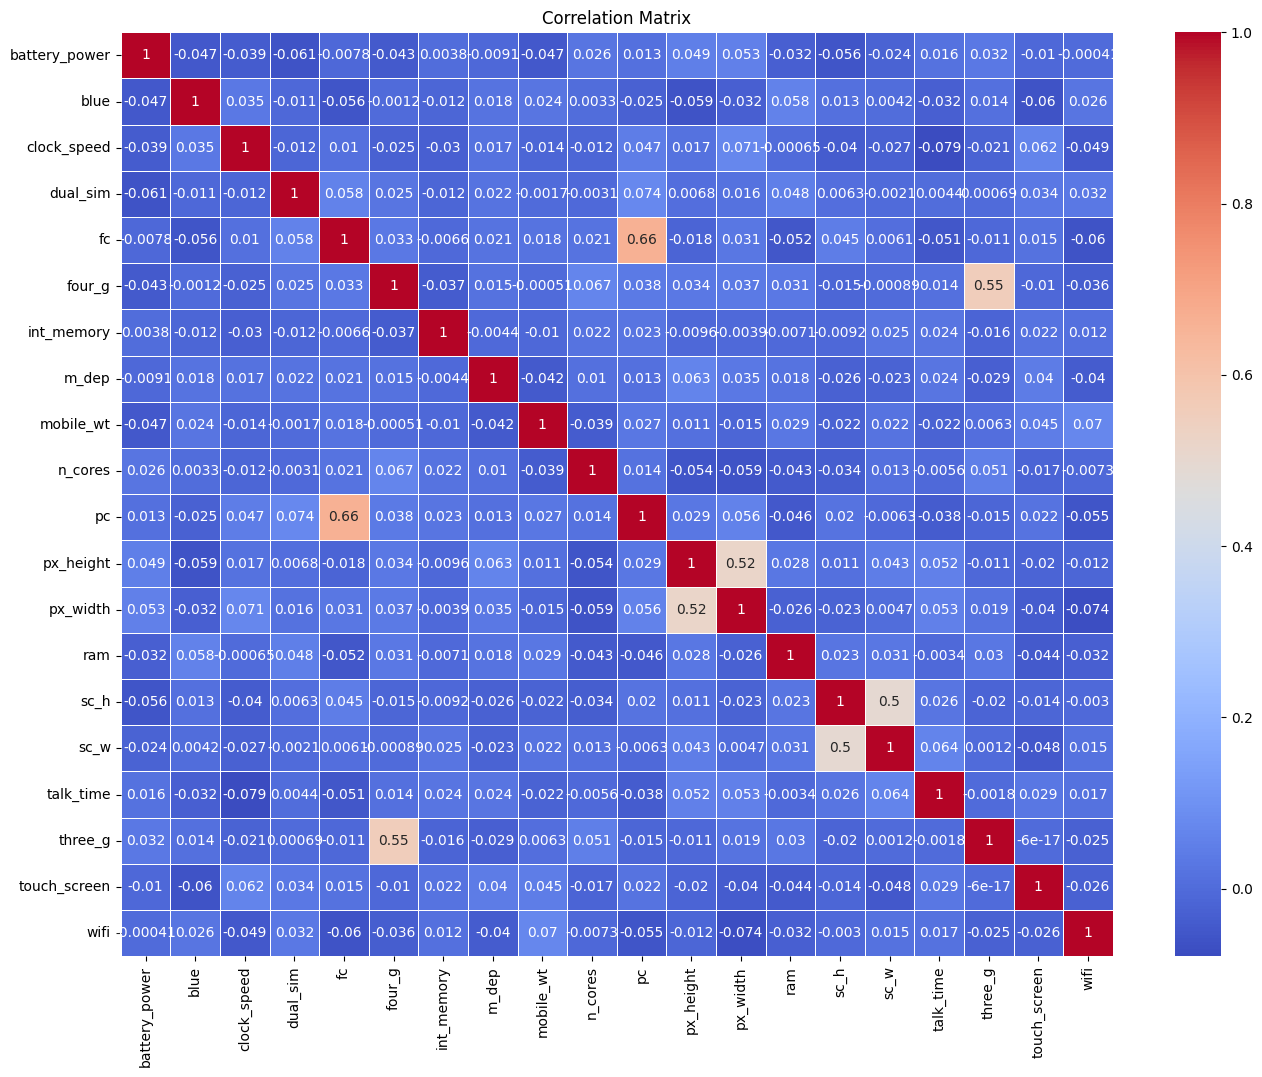

In [103]:
# Heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

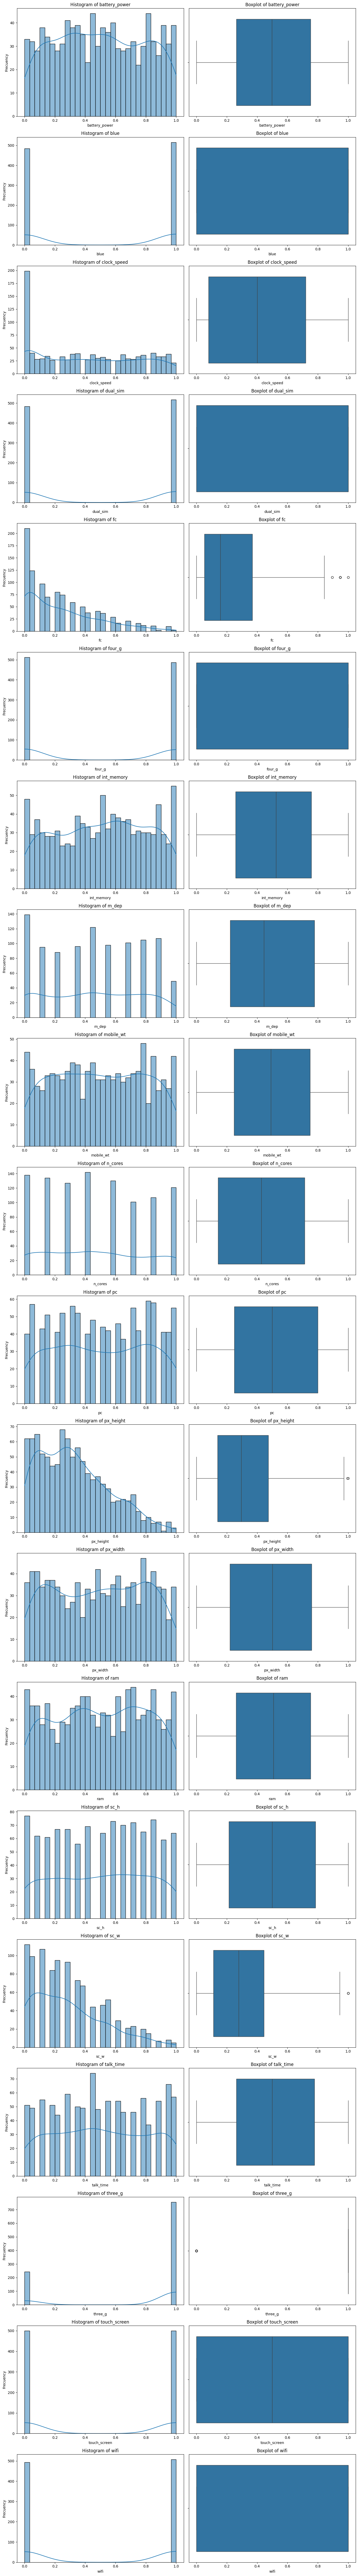

In [104]:
plt.figure(figsize=(14, (len(df.columns)*5)))

for i, column in enumerate(df.columns):
    plt.subplot(len(df.columns), 2, i * 2 + 1)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuency')

    plt.subplot(len(df.columns), 2, i * 2 + 2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

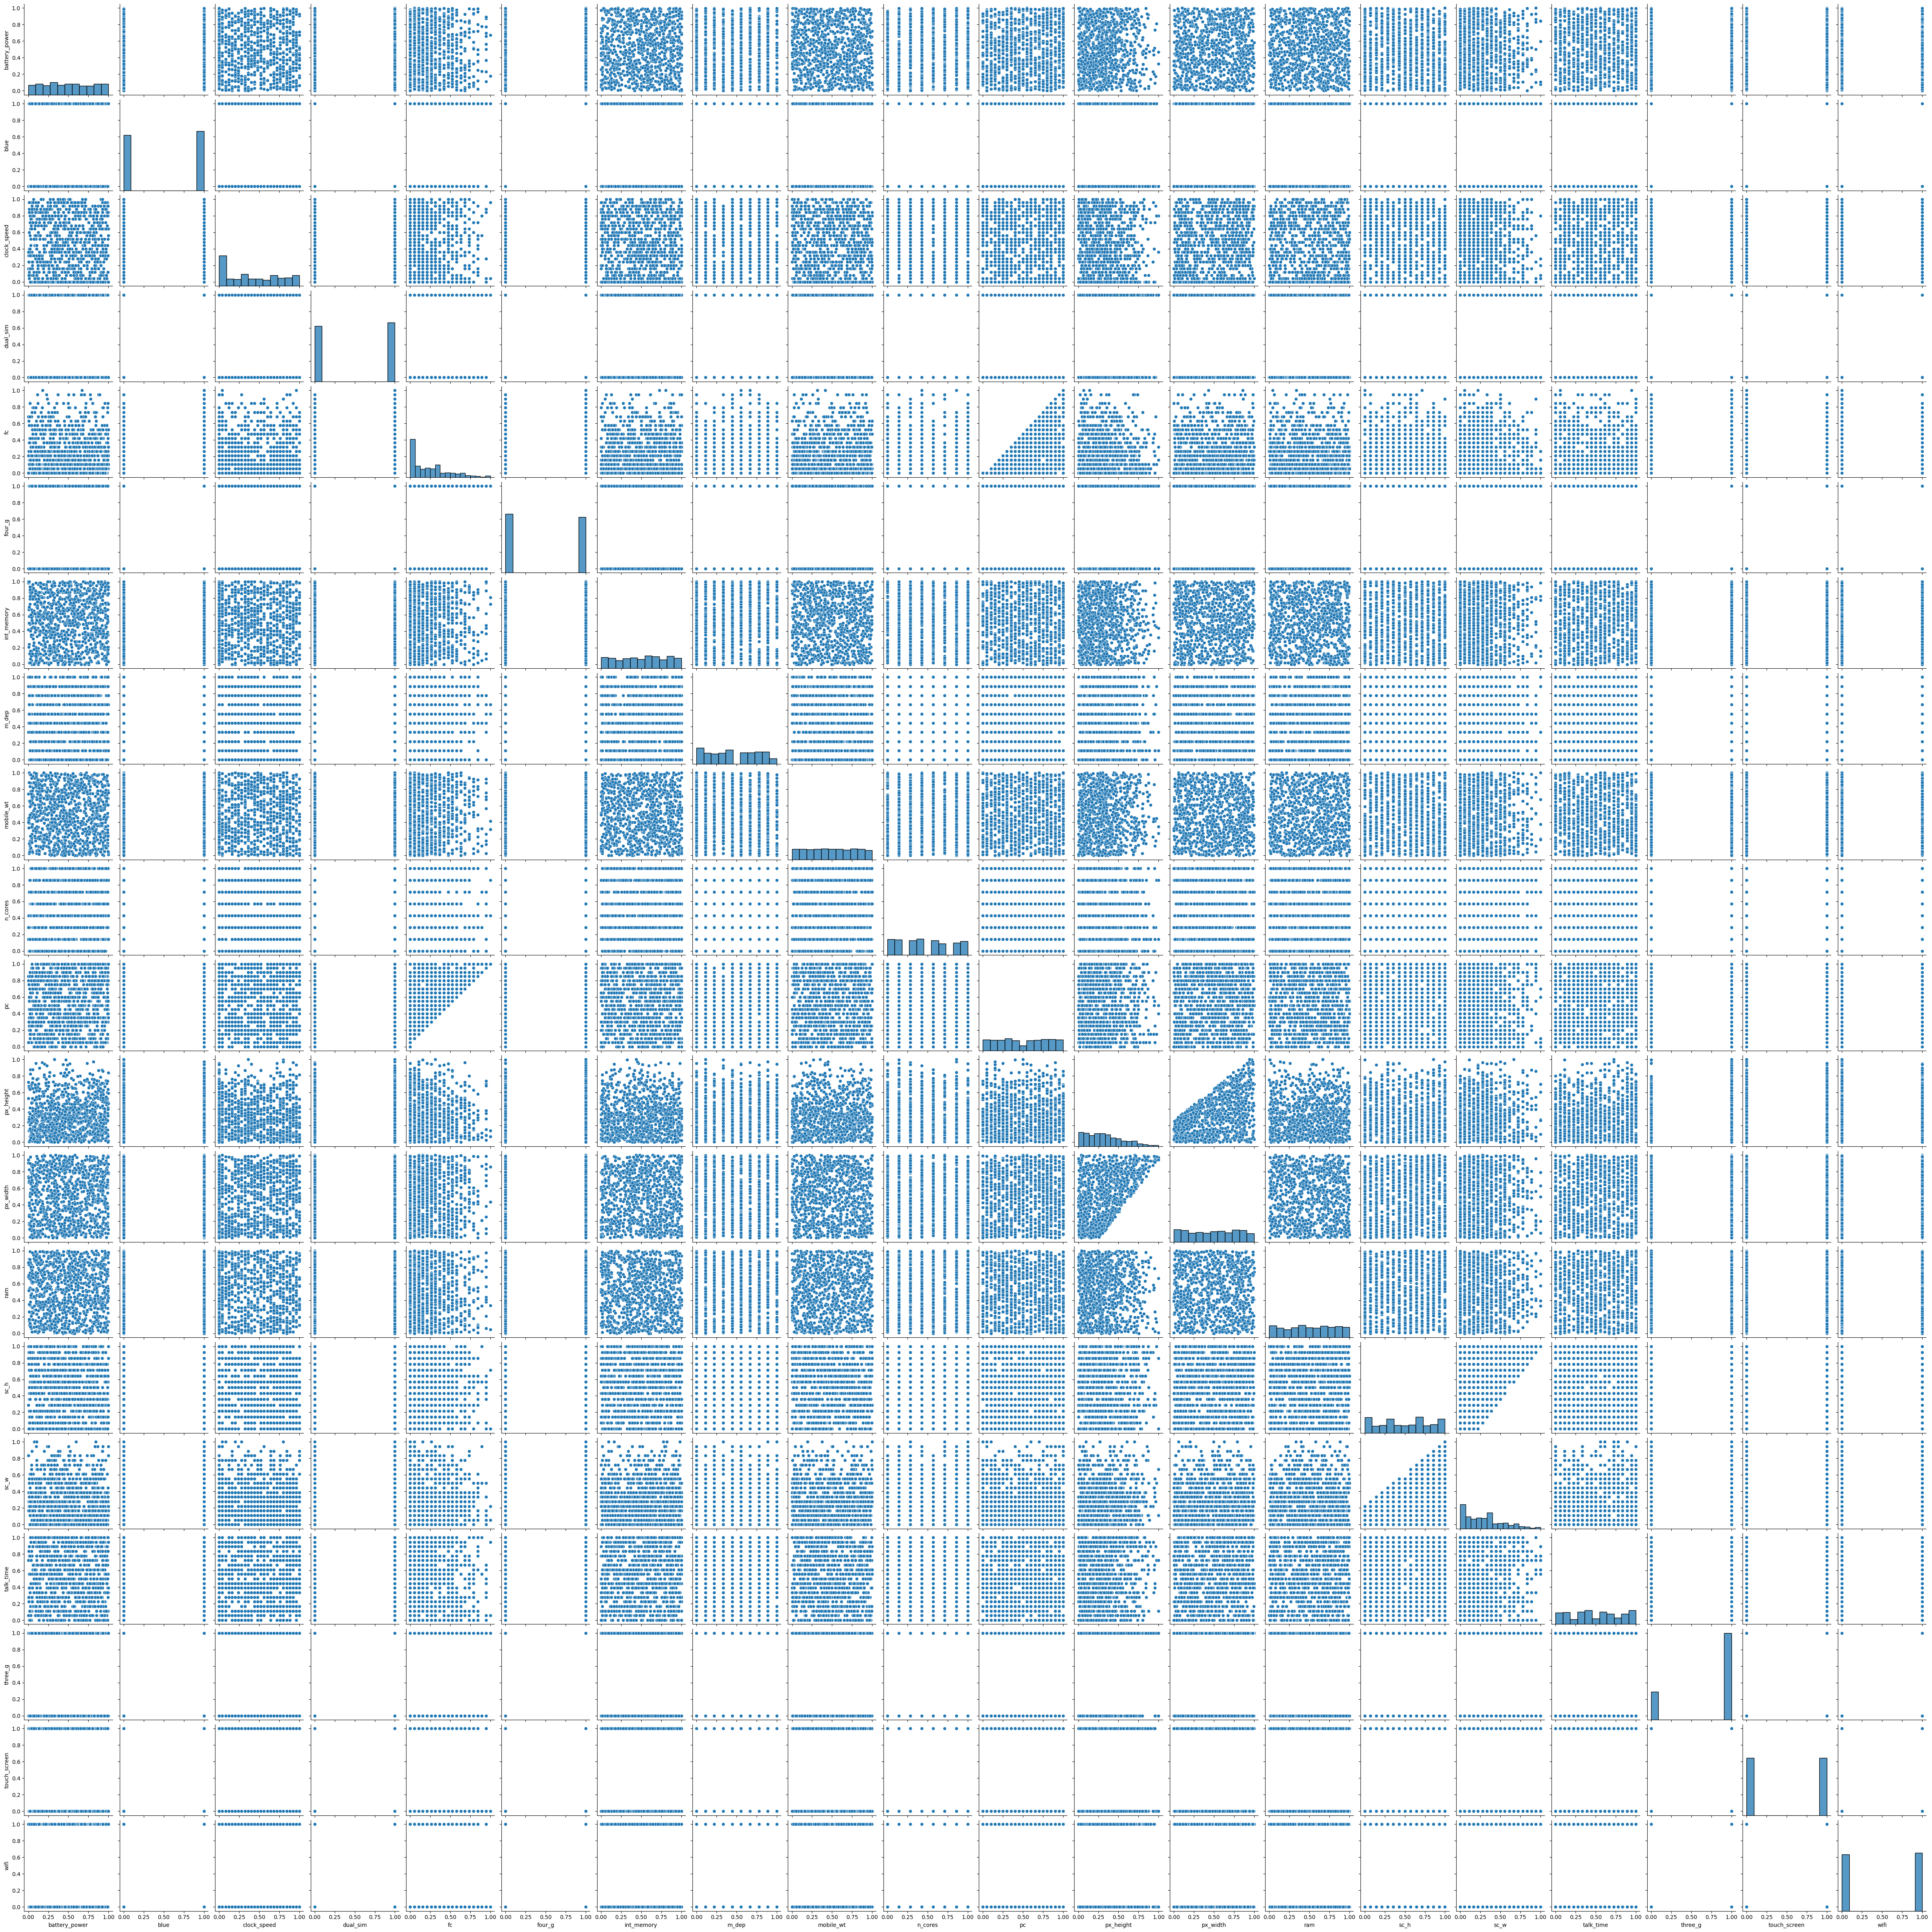

In [105]:
sns.pairplot(df)

# Random Forest Regressor

In [106]:
# 3. Dataset Splitting
x = df.drop('battery_power', axis=1)
y = df['battery_power']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((700, 19), (300, 19))

In [108]:
# 4. Building and Training the Random Forest Model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [109]:
# 5. Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.08993573037250539
Mean Absolute Error: 0.25619514120524794


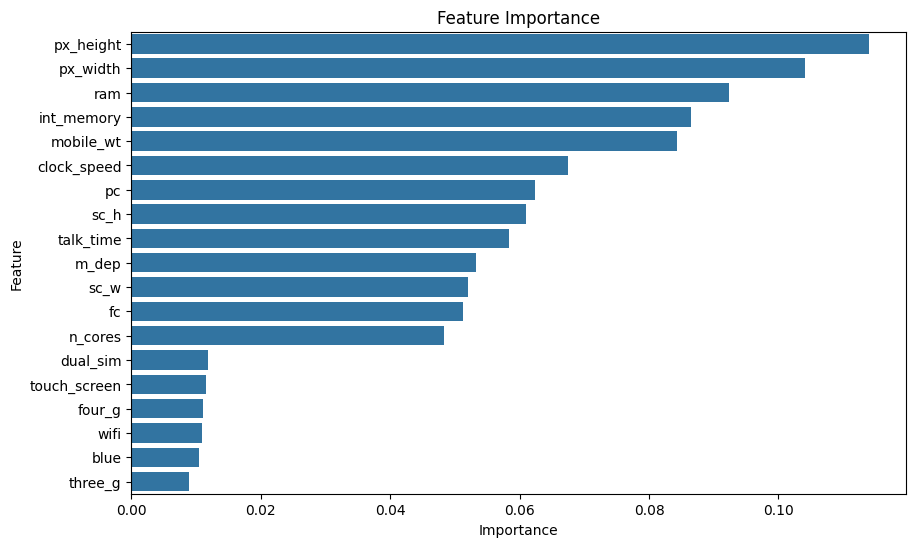

In [110]:
# 6. Model interpretation

# Identify which features have the greatest impact on the model.
importances = model.feature_importances_
features_importance = pd.DataFrame({'Feature': x.columns, 'Importance': importances})
features_importance = features_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_importance)
plt.title('Feature Importance')
plt.show()

# Random Forest Classifier

In [125]:
# 3. Dataset Splitting
df['touch_screen'] = df['touch_screen'].replace({0: 'No', 1: 'Yes'})

In [126]:
x = df.drop('touch_screen', axis=1)
y = df['touch_screen']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((700, 19), (300, 19))

In [137]:
# 4. Building and Training the Random Forest Model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [138]:
# 5. Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.47333333333333333
Classification Report:
              precision    recall  f1-score   support

          No       0.47      0.56      0.51       147
         Yes       0.48      0.39      0.43       153

    accuracy                           0.47       300
   macro avg       0.47      0.48      0.47       300
weighted avg       0.47      0.47      0.47       300



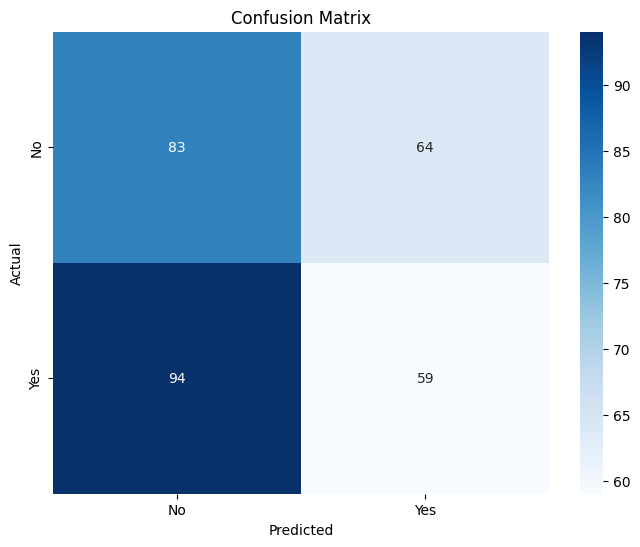

In [139]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

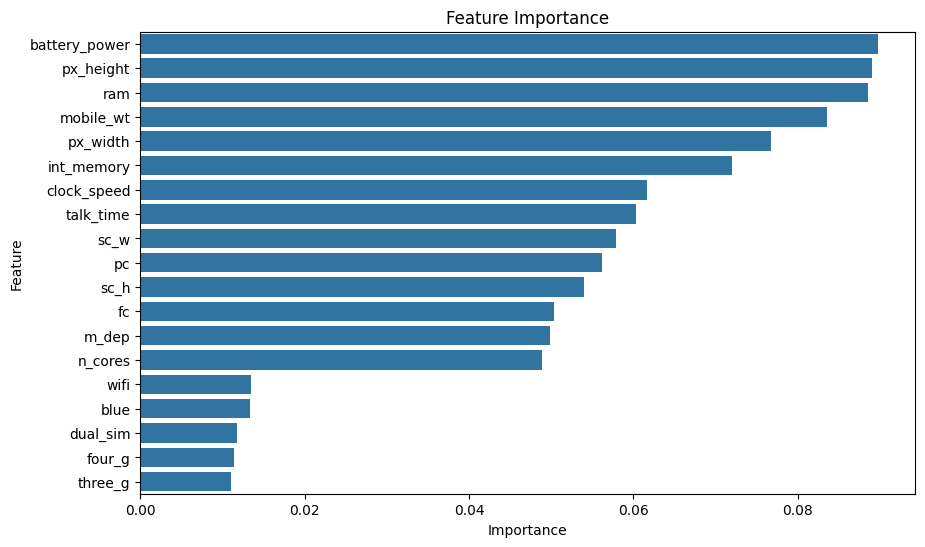

In [140]:
# 6. Model interpretation
importances = model.feature_importances_
features_importance = pd.DataFrame({'Feature': x.columns, 'Importance': importances})
features_importance = features_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_importance)
plt.title('Feature Importance')
plt.show()